In [14]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [15]:
train_df = pd.read_csv("../data/train.csv")
val_df = pd.read_csv("../data/validation.csv")
test_df = pd.read_csv("../data/test.csv")

### Evaluating Naive Bayes on Validation Data

In [20]:
BNB = make_pipeline(CountVectorizer(analyzer='word', ngram_range=(1, 2), binary=True), BernoulliNB())
BNB.fit(train_df["Stemmed"], train_df["Result_Bin"])

# Predict on the test set
y_pred = BNB.predict(val_df["Stemmed"])
y_val = val_df["Result_Bin"]
# Calculate F1
f1 = f1_score(y_val, y_pred)
print("F1 Score:", round(f1,3))
# Calculate Precision
precision = precision_score(y_val, y_pred)
print("Precision:", round(precision, 3))
# Calculate recall
recall = recall_score(y_val, y_pred)
print("Recall:", round(recall, 3))

F1 Score: 0.714
Precision: 0.574
Recall: 0.943


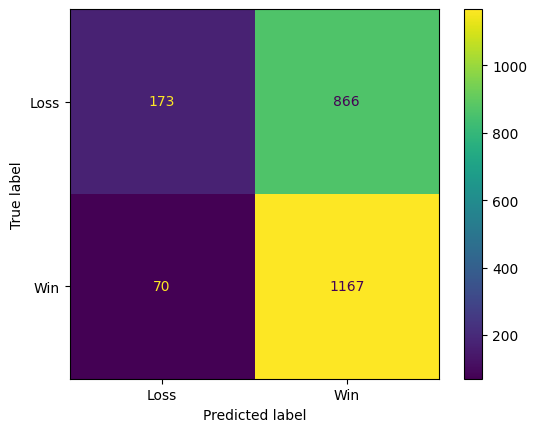

In [21]:
conf_matrix = confusion_matrix(y_val, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = ["Loss","Win"])
cm_display.plot()

### Evaluating Naive Bayes on Testing Data

In [22]:
# Predict on the test set
y_pred = BNB.predict(test_df["Stemmed"])
y_test = test_df["Result_Bin"]
# Calculate F1
f1 = f1_score(y_test, y_pred)
print("F1 Score:", round(f1,3))
# Calculate Precision
precision = precision_score(y_test, y_pred)
print("Precision:", round(precision, 3))
# Calculate Recall
recall = recall_score(y_test, y_pred)
print("Recall:", round(recall, 3))

F1 Score: 0.717
Precision: 0.574
Recall: 0.953


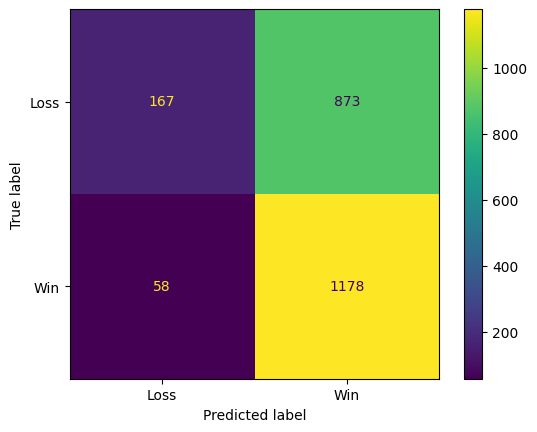

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = ["Loss", "Win"])
cm_display.plot()

In [24]:
test_df["Predicted_Result"] = y_pred
test_df["Predicted_Probability"] = BNB.predict_proba(test_df["Stemmed"])[:, 1]
test_df.head()

,Comment,Result,Comment_Adj,No_Stop,Stemmed,Result_Bin,Predicted_Result,Predicted_Probability
0,I feel like we became too dependent on our rec...,Loss,i feel like we became too dependent on our rec...,feel like became dependent recent late-game he...,feel like becam depend recent late-gam heroic ...,0,1,0.578302
1,I like it even more when I don't think we're g...,Win,i like it even more when i don't think we're g...,like even n't think 're gon na win win anyways,like even n't think 're gon na win win anyway,1,1,0.999777
2,This game confirmed everything I already knew ...,Loss,this game confirmed everything i already knew ...,game confirmed everything already knew bobby ’...,game confirm everyth alreadi knew bobbi ’ play...,0,0,0.300150
3,I’m in shock as a Blazers fan. I know for a fa...,Loss,i’m in shock as a blazers fan i know for a fac...,’ shock blazers fan know fact lillard play way...,’ shock blazer fan know fact lillard play way ...,0,1,0.999483
4,Can we please change the banner to our current...,Win,can we please change the banner to our current...,please change banner current bucks roster ’ wa...,pleas chang banner current buck roster ’ want ...,1,1,0.999648
